In [1]:
from music21 import *
from IPython.display import Image as img
from PIL import Image

(sec-scales)=
# Scales & Keys

We already saw in section [Intervals](sec-intervals) that the naming convention in music theory is quite elaborate.
However, if you get the main concept it makes a lot of sense.
If you talk about scales, intervals, [chords](sec-chords) or keys, terms like *major*, *minor*, *diminished*, *third* and so on, point to the same underlying concept.
Still, as a beginner coming from a rigorous discipline, I found the terms *scales*, *keys*, and *modes*, confusing because they seem to blend into one another.
Let me start with a clear differentiation between *scales* and *keys*.

Sometimes musicians speak of a scale and sometimes of a key as if these two terms are interchangeable.
A scale places the [notes](sec-notes) in a **specific order**, up and down the keyboard, while *key* refers to all the notes of the same *scale* in **any order**
and all possible combinations.
For example, if we play multiple notes, we play these in the *key of C (major)*.
We also use the note from the C major *scale*.
If we think of notes that make up a scale but do not think of them in any particular order, we think of 'the key of C (major)'.

A *musical scale (Tonleiter)* is an **ordered** set of pitches, together with a formula for specifying their frequencies.
Each individual pitch of a scale is called a *degree (Tonstufe)*.

Most musical traditions use *octave intervals* to associate pitches that serve the same musical function (*unison*) such that a scale is completely defined by one *octave* because of *octave equivalence*, i.e., *the basic miracle of music*.
In that case, any *degree* is a member of a class that it shares with the same degree in all other octaves.
All pitches of a *degree* of a scale are within the same *pitch classes*.
Thus some use the terms *note* and *pitch class* interchangeable.

The **tonic** of a scale (also the "home" of the *keys*), is usually the first note in the respective *scale*, that is, it has degree 1.
Note that in ``sclang`` it has degree 0, since we count from zero.

(sec-chromatic-scale)=
## Chromatic Scale

The *chromatic scale*, which translates to *colorful scale*, consists of all twelve pitches (within an octave) we know from a piano.

$$\text{C, C#/Db, D, D#/Eb, E, F, F#/Gb, G, G#/Ab, A, A#/Bb, B}.$$

It is an extension of the [diatonic scale](sec-diatonic-scale).
The *chromatic scale* is so dense such that notes within the scale lack a clear characterization.
It is used in the *atonal* twelve-tone technique of Arnold Schönberg which is a form of *post-tonal* thinking, i.e., composing without a tonal center.

Note that, for example, C# (C raised by a semitone) and Db (D lowered by a semitone) are represented by the same keys on the piano but within a specific *scale/key* they serve different purposes.
Compare the following code that plays the *chromatic scale*.

```isc
(
Pbindef(\melody,
    \instrument, \default,
    \scale, Scale.chromatic,
    \degree, Pseq((0..12), inf),
    \octave, 3,
    \dur, 0.25,
    \amp, 1
).play;
)
```

In [2]:
import IPython.display as ipd
audio_path = '../../../sounds/chromatic-scale.mp3'
ipd.Audio(audio_path)

We can also print out the *cents* for each degree:

```isc
Scale.chromatic.cents;
```

Note that on a note sheet for Western music only the letter of a note, i.e. C-D-E-F-G-A-B, determines its position.
Raising a note by a semitone (100 cents) is indicated by the sharp # and lowing it by the same amount is indicated by a small b.

E, F, B, and C are special because the interval E-F is only one half step (100 semitones) and so is B-C.
Any other interval between consecutive letters, e.g. A-B, are whole steps.
Consequently, sharpening an E gives us an F, i.e. E# = F.
Furthermore, Fb = E, B# = C and Cb = B.
On the piano we find two special areas at consecutive white keys.

The following shows the chromatic scale up and down one octave.
I use sharps when going up and flats when going down.

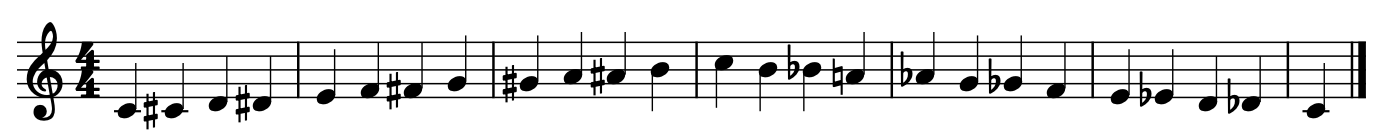

In [3]:
# Chromatic Scale
s = stream.Stream()
s.append(key.Key('C'))
s.append(meter.TimeSignature('4/4'))
s.append(note.Note('C', quarterLength=1))
s.append(note.Note('C#', quarterLength=1))
s.append(note.Note('D', quarterLength=1))
s.append(note.Note('D#', quarterLength=1))
s.append(note.Note('E', quarterLength=1))
s.append(note.Note('F', quarterLength=1))
s.append(note.Note('F#', quarterLength=1))
s.append(note.Note('G', quarterLength=1))
s.append(note.Note('G#', quarterLength=1))
s.append(note.Note('A', quarterLength=1))
s.append(note.Note('A#', quarterLength=1))
s.append(note.Note('B', quarterLength=1))
s.append(note.Note('C5', quarterLength=1))
s.append(note.Note('B', quarterLength=1))
s.append(note.Note('Bb', quarterLength=1))
s.append(note.Note('A', quarterLength=1))
s.append(note.Note('Ab', quarterLength=1))
s.append(note.Note('G', quarterLength=1))
s.append(note.Note('Gb', quarterLength=1))
s.append(note.Note('F', quarterLength=1))
s.append(note.Note('E', quarterLength=1))
s.append(note.Note('Eb', quarterLength=1))
s.append(note.Note('D', quarterLength=1))
s.append(note.Note('Db', quarterLength=1))
s.append(note.Note('C', quarterLength=1))


path = s.write('musicxml.png')
im = Image.open(path)
# (left, top, right, bottom)
im = im.crop((170, 310, 1550, 450))
display(im)

To find a specific key on the piano, we can orient ourselves by the white keys and then move up or down one semitone accordingly.
Note also that many notes such as D# and Eb are *enharmonic* (equal in pitch).

(sec-diatonic-scale)=
## Diatonic Scale

Western music's prototype of all scale system is the *diatonic scale*.
It is also known as the *major scale* and it is often regarded as invoking an overall happy feeling.
Other than the [chromatic scale](sec-chromatic-scale) the *diatonic scale* is much more sparse.

```isc
Scale.major;
```

Instead of twelve, it has only eight pitches (and seven pitch classes), named with the seven letters C, D, E, F, A, B, C corresponding to the seven *degrees* of this scale.
In German, we swap the B for the H.
The *diatonic scale* is built from two-interval sizes, the *half step* (*semitone*) and the *whole step* where a *whole step* (*whole tone*) contains exactly two *half steps*.
A half step is equal to 100 (minor second) and a whole step to 200 cents (major second).
The *interval sequence* of the diatonic scale, defined by the following tuple,

\begin{equation}
    (2,2,1,2,2,2,1)_{\text{major}}
\end{equation}

is the sequence of whole (2 semitones / 1 tone / whole step) and half steps (1 semitone / half step) in the scale.

```isc
( // major A scale
Pbind(
    \instrument, \default,
    \scale, Scale.major,
    \degree, Pseq((0..7), 1),
    \root, 5, // A (C=0, D=1, E=2, F=3, G=4, A=5)
    \dur, 0.25
).play;
)
```

In [4]:
import IPython.display as ipd
audio_path = '../../../sounds/a-major-scale.mp3'
ipd.Audio(audio_path)

Its *sparsity* (using only seven notes per octave) gives each note in the scale a distinctive tone, while its *asymmetry* is an important property that gives each note in the scale a unique relation to the other notes.
Together, *sparsity* and *asymmetry* provide the listener with a clear orientation within the scale.

```{figure} ../../../figs/composing/piano-keys-major-scales-1.png
---
width: 800px
name: fig-piano-keys-major-scales-1
---
```

```{figure} ../../../figs/composing/piano-keys-major-scales-2.png
---
width: 800px
name: fig-piano-keys-major-scales
---
C major scale **C** (or keys of C major) in blue and D# major **D#** scale in red.
```

The diatonic scale is so important, that it is built into the piano keys and the *staff notation*, e.g., C, C# and Cb occupy the same staff line.

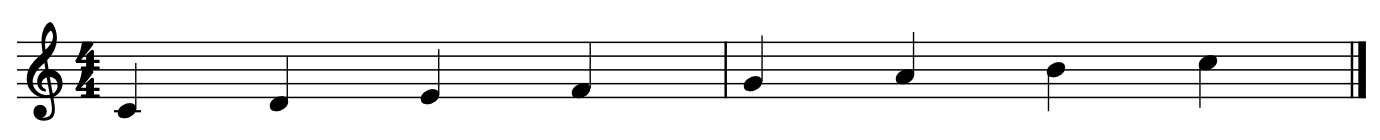

In [5]:
# Diatonic Scale
s = stream.Stream()
s.append(key.Key('C'))
s.append(meter.TimeSignature('4/4'))
s.append(note.Note('C', quarterLength=1))
s.append(note.Note('D', quarterLength=1))
s.append(note.Note('E', quarterLength=1))
s.append(note.Note('F', quarterLength=1))
s.append(note.Note('G', quarterLength=1))
s.append(note.Note('A', quarterLength=1))
s.append(note.Note('B', quarterLength=1))
s.append(note.Note('C5', quarterLength=1))

path = s.write('musicxml.png')
im = Image.open(path)
# (left, top, right, bottom)
im = im.crop((170, 310, 1550, 450))
display(im)

One important characteristic property of the *diatonic scales* is that they can be obtained from a chain of six successive **perfect fifths**.
For example, the C major scale is obtained from an ascending chain of six perfect fifths starting from F.
If we start with F and successively add 7 semitones, we land at F-C-G-D-A-E-B.

The following code computes this sequence.

```isc
(
// computes the note for a given midinote
~toNote = {
    arg midinote;
    var notes = [
        'C', 'C# / Db', 'D', 
        'D# / Eb', 'E', 'F', 
        'F# / Gb', 'G', 'G# / Ab',
        'A', 'A# / Bb', 'B'
    ];
    notes[midinote % 12] ++ (midinote / 12 - 2).floor.asInteger;
};

// F3
~toNote.(65); 

// [ F3, C4, G4, D5, A5, E6, B6 ]
Array.series(size: 7, start: 65, step: 7).collect({arg k; ~toNote.(k)});
)
```

In the *diatonic scale* and its [modes](sec-modes) each degree has its specific name hinting to its role.
Note that in SuperCollider we [count](attention-sc-counting) from 0.

| Degree | Name          | Symbol        | Semitones |
| ------ | ------------- | ------------- | --------- |
| 1      | Tonic         | I             | 0         |
| 2      | Supertonic    | II            | 2         |
| 3      | Mediant       | III           | 4         |
| 4      | Subdominant   | IV            | 5         |
| 5      | Dominant      | V             | 7         |
| 6      | Submediant    | VI            | 9         |
| 7      | Leading tone  | VII           | 11        |


Looking closely at the [interval](sec-intervals) sequence, the group $(2,2,1)$ is followed by $(2,2,2,1)$.
From the tonic to any other note, all intervals of the major scale are major intervals!
Therefore, the diatonic scale has a strong *leading tone* pulling us heavily into its *tonic* since it is only one semitone apart from it.
The dominant as well as the subdominant are **perfect** (P5 / P4) thus very consonant with the *tonic*.

```isc
(
Pbind(
    \scale, Scale.major,
    \degree, Pseq([(0..6), [0]].allTuples, 1),
    \dur, 0.5
).play;
)
```

In [6]:
import IPython.display as ipd
audio_path = '../../../sounds/major-intervals.mp3'
ipd.Audio(audio_path)

(sec-minor-scale)=
## Minor Scales

The *minor scale*, also known as *natural minor scale*, uses the standard *diatonic interval sequence* but starts on degree 6 (counting from one).
It is often regarded as invoking an overall sad feeling.

We get the *minor interval sequence* by shifting the diatonic interval sequence by 2 to the right or by 5 to the left.
Therefore, it has the same *sparsity* as well as *asymmetry*. as the [diatonic scale](sec-diatonic-scale).

```isc
( // minor D
Pbind(
    \instrument, \default,
    \scale, Scale.minor,
    \degree, Pseq((0..7), 1),
    \root, 2, 
    \dur, 0.25
).play;
)
```

In [7]:
import IPython.display as ipd
audio_path = '../../../sounds/d-minor-scale.mp3'
ipd.Audio(audio_path)

The *minor scale* is also called **natural minor** and is also known as the *Aolian [mode](sec-modes)*.

\begin{equation}
    (2,1,2,2,1,2,2)_\text{nat. minor}
\end{equation}

This gives us: C, D, Eb, F, G, Ab, Bb.

```{figure} ../../../figs/composing/piano-keys-minor-scales-1.png
---
width: 800px
name: fig-piano-keys-minor-scales-1
---
```

```{figure} ../../../figs/composing/piano-keys-minor-scales-2.png
---
width: 800px
name: fig-piano-keys-minor-scales
---
C minor scale (or keys of C minor) in blue and D# minor scale in red.
```

Looking closely at the [interval](sec-intervals) sequence, one can see that the minor scale has a less strong *leading tone* because it is two semitones apart from the *tonic*.
This property is sometimes unwanted which leads to the harmonic and melodic minor scales.
Furthermore, three out of all the intervals from the tonic to any other note are minor intervals!
This makes the *harmonic minor* a little bit exotic.

| Degree | Name          | Symbol         | Semitones |
| ------ | ------------- | -------------- | --------- |
| 1      | Tonic         | I              | 0         |
| 2      | Supertonic    | II             | 2         |
| 3      | Mediant       | iii            | 3         |
| 4      | Subdominant   | IV             | 5         |
| 5      | Dominant      | V              | 7         |
| 6      | Submediant    | vi             | 8         |
| 7      | Leading tone  | vii            | 10        |


As mentioned above, there is also the **harmonic minor scale** for which the seventh note is raised by one semitone such that we recover the strong leading tone of the major scale.
It is often used for harmonization within a major key.

\begin{equation}
    (2,1,2,2,1,3,1)_\text{ham. minor}
\end{equation}

This gives us: C, D, Eb, F, G, Ab, B.
The gap between A flat and B introduces a new large interval of three semitones.

```isc
( // D harmonic minor  
Pbind(
    \instrument, \default,
    \scale, Scale.harmonicMinor,
    \degree, Pseq((0..7), 1),
    \root, 2, 
    \dur, 0.25
).play;
)
```

In [8]:
import IPython.display as ipd
audio_path = '../../../sounds/harmonic-minor.mp3'
ipd.Audio(audio_path)

The last variation is the **melodic minor scale** for which the sixth and seventh notes are raised.

\begin{equation}
    (2,1,2,2,2,2,1)_\text{mel. minor}
\end{equation}

This gives us: C, D, Eb, F, G, A, B.
Sometimes the natural minor is used if we play in descending order which gives us: C, D, Eb, F, G, A, B, A, G, F, E, D, C.

```isc
( // D melodic minor  
Pbind(
    \instrument, \default,
    \scale, Scale.melodicMinor,
	\degree, Pseq((0..6)++(5..0), 1),
    \root, 2, 
    \dur, 0.25
).play;
)
```

In [9]:
import IPython.display as ipd
audio_path = '../../../sounds/melodic-minor.mp3'
ipd.Audio(audio_path)

(sec-transpositions)=
## Transpositions

If a scale starts on any *pitch class* other than C, it is said to be *transposed*.
The diatonic scale can be transposed to any chromatic degree so long as the *[diatonic interval sequence](sec-diatonic-scale)* is preserved.
For example, the diatonic scale transposed to G by the introduction of F# is the *key of G*.
From now on, we abbreviate any *major/minor scale* with a bold letter, e.g., the *D major scale* is written as **D** and the *D minor scale* as **Dm**.

We also say that we play a certain piece in *key of G major* or just *G major* or **G**.
The untransposed diatonic scale is the *key of C*.
As I we already saw, to transpose to another *key/scale* in ``sclang``, we define the ``\root`` to be different than 0.

Let us consider the degrees of *major scale* (key of C) with respect to the chromatic scale:

$$C_\text{major} = (1, 3, 5, 6, 8, 10, 12) = (\text{C, D, E, F, G, A, B }).$$

Transposing the scale by the interval of seven semitones upwards, gives us

$$G_\text{major} = (8, 10, 12, 1, 3, 5, 7) = (\text{G, A, B, C, D, E, F#})$$

and transposing it by 7 semitones downwards gives results in

$$F_\text{major} = (6, 8, 10, 11, 1, 3, 5) = (\text{F, G, A, A#, C, D, E}).$$

Transposing again and again by seven semitones will add additional sharps and flats.
Consecutive transpositions by seven semitones, i.e. by **perfect fifths**, sound similar.
They share many notes thus musical properties.
Therefore, composers tend to move on the circle of fifth if they move at all.

The following code generates all *major* scales by trasposing by seven semitones.
Note that I use only sharps instead of mixing in flats:

```isc
(
~translate = {arg degree;
    var result = Array.fill(7, '');
    var sum = degree;
    var majorIntervals = [2, 2, 1, 2, 2, 2];
    var chromaticKeys = [
        "C", "C#", "D", "D#", 
        "E", "F", "F#", "G", 
        "G#", "A", "A#", "B"];
    var rotation = 0;
    result[0] = chromaticKeys[degree % 12];
    for(0, majorIntervals.size-1, {arg i;
        result[i+1] = chromaticKeys[(sum+majorIntervals[i])%12];
        sum = sum + majorIntervals[i];
    });
    result;
});

(
(0..12).do({ arg i;
    ~translate.(i*7).postln;
});
)
```

The circular result is depicted in the following table.
After **F** everything is repeated.
We could construct a similar table for all *minor* scales.

| Scales                | Pitches                                                     | Sharps | Flats  |
| --------------------- | ----------------------------------------------------------- | ------ | ------ |
| **C**/**Am**          | C, D, E, F, G, A, B                                         | 0      | 0      |
| **G**/**Em**          | G, A, B, C, D, E, F#                                        | 1      |        |
| **D**/**Bm**          | D, E, F#, G, A, B, C#                                       | 2      |        |
| **A**/**F#m**         | A, B, C#, D, E, F#, G#                                      | 3      |        |
| **E**/**C#m**         | E, F#, G#, A, B, C#, D#                                     | 4      |        |
| **B**/**G#m**         | B (Cb), C# (Db), D# (Eb), E (Fb), F# (Gb), G# (Ab), A# (Bb) | 5      | 7      |
| **F#/Gb**/**Ebm/D#m** | F# (Gb), G# (Ab), A# (Bb), B (Cb), C# (Db), D# (Eb), E# (F) | 6      | 6      |
| **Db**/**Bbm**        | C# (Db), D# (Eb), E# (F), F# (Gb), G# (Ab), A# (Bb), B# (C) | 7      | 5      |
| **Ab**/**Fm**         | Ab, Bb, C, Db, Eb, F, G                                     |        | 4      |
| **Eb**/**Cm**         | Eb, F, G, Ab, Bb, C, D                                      |        | 3      |
| **Bb**/**Gm**         | Bb, C, D, Eb, F, G, A                                       |        | 2      |
| **F**/**Dm**          | F, G, A, Bb, C, D, E                                        |        | 1      |

In general, A# equals Bb, D# equals Eb, G# equals Ab, C# equals Db and F# equals Gb.
As we already discussed a seven semitone [interval](sec-intervals) is called **perfect fifth**.
Adding seven semitones gives us the ratio 

$$2^{7/12} \approx 1.498 \approx 1.5 = 3/2.$$

Therefore, a perfect fifth corresponds to a pair of pitches with a frequency ratio of approximately 3:2, which is the most simple interval excluding the trivial intervals *unison* and the *octave*.
As already mentioned, simple or close to simple ratios sound pleasingly **consonant**, while complex ratios sound **dissonant** and can provide tension.

We get the very same pitch classes by adding the very next perfect fifth while dropping the last one.
The following code generates the major scales by adding perfect fifths.
I use the function ``toNote`` introduced in section [Notes & Midi Notes](sec-notes).

```isc
(
Array.fill(12, {arg i; 
    Array.series(
        size: 7, 
        start: 65+(i*7), 
        step: 7).collect({arg k; ~toNote.(k)})});
)
```

gives us

```isc
[
[ F3, C4, G4, D5, A5, E6, B6 ],
[ C4, G4, D5, A5, E6, B6, F#7 ],
[ G4, D5, A5, E6, B6, F#7, C#8 ],
[ D5, A5, E6, B6, F#7, C#8, G#8 ],
[ A5, E6, B6, F#7, C#8, G#8, D#9 ],
[ E6, B6, F#7, C#8, G#8, D#9, A#9 ],
[ B6, F#7, C#8, G#8, D#9, A#9, F10 ],
[ F#7, C#8, G#8, D#9, A#9, F10, C11 ],
[ C#8, G#8, D#9, A#9, F10, C11, G11 ],
[ G#8, D#9, A#9, F10, C11, G11, D12 ],
[ D#9, A#9, F10, C11, G11, D12, A12 ],
[ A#9, F10, C11, G11, D12, A12, E13 ],
[ F10, C11, G11, D12, A12, E13, B13 ]
]
```

(sec-circle-of-fifths)=
## The Circle of Fifths

[Major](sec-diatonic-scale) and [minor scales](sec-minor-scale) are very prominent.
They are widely used in all areas of music compositions.
Interestingly, for each *major scale* there is a corresponding *minor scale* which consists of the exact same *pitch classes*, e.g. **C** (C major) corresponds to **Am** (A minor).
This relationship is often depicted as the so called *circle of fifth*, we computed with by adding **perfect fifths**.

```{figure} ../../../figs/composing/circle-of-fifths-dark.png
---
width: 800px
name: fig-circle-of-fifths
---
The *circle of fifths* and the *circle of fourths*.
```

If the Western system is used, then the *circle of fifths* reflects the degree of musical similarity between different scales; the closer two scales are located on the circle, the more they share in terms of tonal material.
In music, *modulations* are used to move from one *scale* or musical *key* to another.
Modulation is a broad term.
It is the change from one tonality (*tonic*, or *tonal center*) to another.

Since six out of seven notes are shared by adjacent scales, a modulation by a perfect fifth can be accomplished in a very smooth fashion by only changing one note by a semitone.
Moving from the top **C** adds more and more accidentials (# / b).

Intuitively, the [chromatic scale](sec-chromatic-scale) may be regarded as a *global world* that contains all available tonal material.
The [major](sec-diatonic-scale) and [minor scales](sec-minor-scale) can then be regarded as *local regions* of this world, each having its own *harmonic* flavor.
The circle of fifths provides an orientation guide for the music to smoothly travel (if desired) from one region to another region.

(sec-modes)=
## Modes

While changing the tonic of a scale by letting the interval sequence untouched is a [transposition](sec-transpositions) of the scale, changing the interval sequences creates a completely different scale.

### Construction

If we take the major interval sequence $(2, 2, 1, 2, 2, 2, 1)$ and shift/rotate it, we can construct 7 different *modes*.
For example, by shifting the *major scale intervals* by 2 to the right (or 5 to the left) gives us the *[natural minor](sec-minor-scale)*.

In SuperCollider we can generate all the different modes by *array rotation* using ``rotate``:

```isc
// generation of different modes
~majorIntervalOrder = [2,2,1,2,2,2,1]                // major interval sequence
~minorIntervalOrder = [2,1,2,2,1,2,2]                // (nat.) minor interval sequence
~intervalToDegrees.(~majorIntervalOrder)             // major degrees
~intervalToDegrees.(~minorIntervalOrder)             // (nat.) minor degrees
~intervalToDegrees.(~majorIntervalOrder.rotate(2))   // (nat.) minor degrees (by rotation)
```

*Major* and *minor scales* are synonyms for *Ionian* and *Aeolian mode*.
The initial degree of a mode is called *final*.
If we additional define the *tonic* of the scale, the *final* correspond to the *tonic* which is typically the *pitch class* at which a piece ends.

Again, adding a fixed number of semitones/half steps to our C major scale does not change the mode but the key, e.g. from **C** to **D**.
In that case we change the *tonic* [note](sec-notes) and [chord](sec-chords) of the scale but letting the interval sequence intact.
To change the *mode* and the *key* of our piece we change both: the *tonic* note and the interval sequence, that is, the *mode*.

| Mode            | Interval sequence                  | Notes (tonic = G) |
| --------------- | ---------------------------------- | ----------------- |
| Ionian (Major)  | $(2, 2, 1, 2, 2, 2, 1)$            | G A B C D E F#    |
| Dorian          | $(2, 1, 2, 2, 2, 1, 2)$            | G A Bb C D E F    |
| Phrygian        | $(1, 2, 2, 2, 1, 2, 2)$            | G Ab Bb C D Eb F  |
| Lydian          | $(2, 2, 2, 1, 2, 2, 1)$            | G A B C# D E F#   |
| Mixolydian      | $(2, 2, 1, 2, 2, 1, 2)$            | G A B C D E F     |
| Aeolian (Minor) | $(2, 1, 2, 2, 1, 2, 2)$            | G A Bb C D Eb F   |
| Locrain         | $(1, 2, 2, 1, 2, 2, 2)$            | G Ab Bb C Db Eb F |

Overall a **scale** is fully defined by the note of the **tonic** and a **mode** (an interval sequence).
Any transposition is a valid example of the corresponding mode.
In other words, transposition preserves mode.

Two *parallel keys* have the same *tonic note*.
For example, in both **C** (C major) and **Cm** (C minor), the tonic is C.
However, *relative keys* (two different scales that share a *key signature*) have different *tonics*
For example, **C** and **Am** share a *key signature*, despite having different tonic pitches (C and A, respectively).

So there a scales and modes.
But how do we determine the mode and scale of a piece?
Well, first we try to figure out the *tonic [note](sec-notes)* and *tonic [chrod](sec-chords)*.
If there are a lot of Gs and Bs and Ds, the tonic chord is probably a *G major chord*, i.e. G-B-D.
Therefore, the piece is probably in the key of *G major* (*ionian mode*), *lydian* or *mixolyian mode* which is determined by the other notes and chords in the piece.

### Qualities

In the following, I describe the different modes using the notes from the table above, i.e., the tonic note stays G.

The **ionian** (major scale) is very happy, one might say sickening happy, and it can be challenging to make something sound interesting.

The **dorian** mode is a rather smooth and Irish-sounding mode.
The note of interest is the *natural sixth* E.
For example, *Carlos Santana* uses the dorian mode a lot.
It is minor, i.e., a little bit dark but also spicy, and has a little pep and brightness.
It is a watered-down minor because it has the *natural sixth* detouring from the flat sixth, which gives the mode some of the major's quality.

**Phrygian** sounds a little creepy, dark, and tense.
The note of interest is the *flat second* Ab
It has an exotic flavor to it.
The flat second can be used to bring in a lot of tension.

**Lydian** is the sci-fi mode.
The note of interest is the *tritone*.
It sounds floaty, spacy, and wide because we have a major triad (G-B-D) but also the [tritone](sec-tritone) G-C#.

**Mixolydian** is rock-ish, Irish, bright, and upbeat.
The note of interest is the *flatten seventh*, i.e, the F.
It is a watered down major.
It lacks the sickening sweetness of major.
It is for fun rock-like music produced by bands like *AC/DC* and *Guns'n Roses*.
Duo to the flattening of the F# in the major scale, we change the leading tone.
The F gives us an unexpected feeling and dilutes the happiness of the major scale.

**Aeolian** (natural minor) is dark, rock-ish, and sad-ish.
The note of interest is the *minor sixth* Eb.
The aeolian is the foundation of most classic rock music pieces.
It is darker than dorian, and less exotic than phrygian.

Looking at the table above, we can see that all except the **locrain** mode contain G and D, i.e., the *fifth*!
Not having a *fifth* makes the tonic chord of the *Locrian* a diminished [triad](sec-triads) which makes the mode rather inharmonic.
Since there are better options to have something with a lot of tension or something odd, locrain is not really used.

We can use the same tonic [chord](sec-chords) and change the mode during a piece.
This is called *model interchange* or *model mixture* and gives the composer the option to wander around across a greater tonal distance.

```isc
// Playing all the different modes with C as the tonic
(
Pbind(
    \instrument, \default,
    \scale, Pseq([
        Scale.ionian,
        Scale.dorian,
        Scale.phrygian,
        Scale.lydian,
        Scale.mixolydian,
        Scale.aeolian,
        Scale.locrian
    ].dupEach(8), 1),
    \degree, Pseq((0..7), 7),
    \root, 0, // C = tonic
    \dur, Pseq(0.25!7 ++ [1], 7),
    \sustain, 0.2
).play;
)
```

In [10]:
import IPython.display as ipd
audio_path = '../../../sounds/modes.mp3'
ipd.Audio(audio_path)

## SuperCollider Scales

An object of the [Scale](https://doc.sccode.org/Classes/Scale.html) class represents not really a *scale* but a *mode*.
To get a scale we have to specifiy the ``\root``, i.e. the *tonic*.
``\root`` expects the number of semitones to go up from C.
``sclang`` provides you with many well-known predefined modes.
You can look them up by calling:

```isc
Scale.directory
```

```{admonition} Counting in sclang
:name: attention-sc-counting
:class: attention
Note that in ``sclang``, we start counting from zero!
```

For example, we can use the *G melodic minor* the following way:

```isc
(
Pbindef(\melody,
    \instrument, \default,
    \scale, Scale.melodicMinor,
    \degree, Pseq((0..7), inf),
    \octave, 4,
    \root, 4, // G
    \dur, 0.25,
    \amp, 1
).play;
)
```

If this is not enough, we can always create our own [Scale](https://doc.sccode.org/Classes/Scale.html).
It is defined by its *degrees*, the number of *pitches* per octave and the [tuninig](sec-tuning) in semitones (100 cents).
In addition we can use ``descDegrees`` to play the scale differently when descending than when ascending.

In the following we re-define the [major scale](sec-diatonic-scale).

```isc
(
Scale(
    degrees: [0, 2, 4, 5, 7, 9, 11], 
    pitchesPerOctave: 12, 
    tuning: [
        0.0, 1.0, 2.0, 
        3.0, 4.0, 5.0, 
        6.0, 7.0, 8.0, 
        9.0, 10.0, 11.0],
    descDegrees: nil,
    name: "my_major"
);
)
```

As you can see, we can introduce a non-standard [tuning](sec-tuning).